In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
x, y = data.iloc[:, 2:11], data.price

In [9]:
x.drop(['view', 'waterfront'], axis=1, inplace=True)

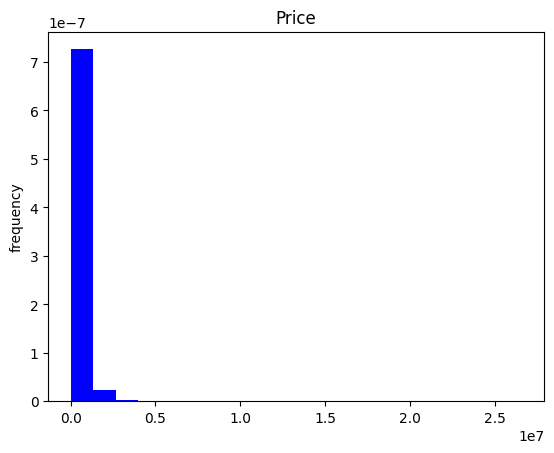

In [10]:
plt.hist(data.price, color='b', density=True, bins=20)
plt.title('Price')
plt.ylabel('frequency')
plt.show()

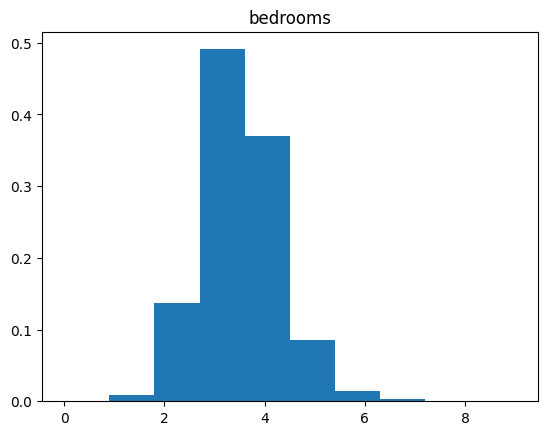

In [11]:
plt.hist(data.bedrooms, density=True)
plt.title('bedrooms')
plt.show()

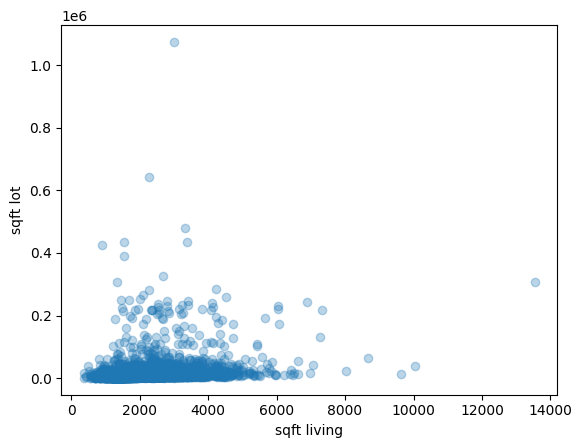

In [12]:
plt.scatter(data.sqft_living, data.sqft_lot, alpha=0.3)
plt.xlabel('sqft living')
plt.ylabel('sqft lot')
plt.show()

<ipython-input-13-c5800093f7a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


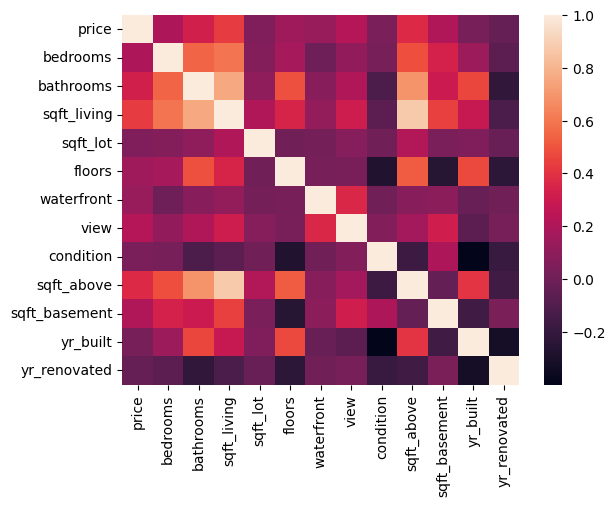

In [13]:
sns.heatmap(data.corr())
plt.show()

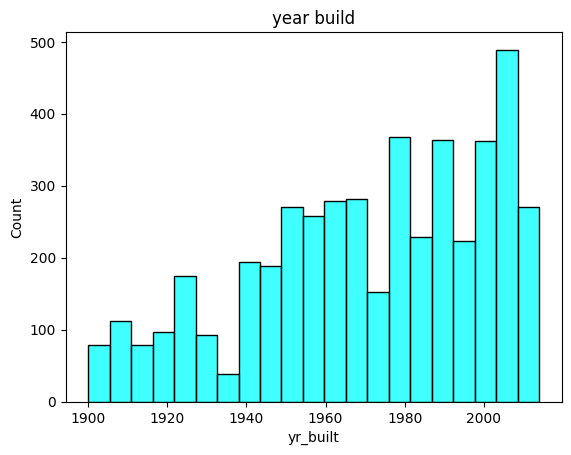

In [14]:
sns.histplot(data.yr_built, color='cyan')
plt.title('year build')
plt.show()

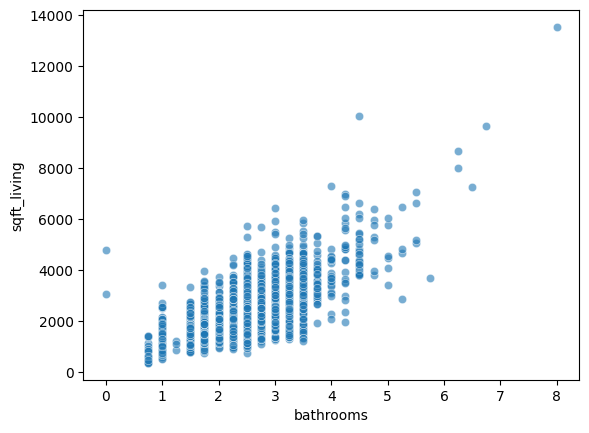

In [15]:
sns.scatterplot(x=data.bathrooms, y=data.sqft_living, alpha=0.6)
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply feature scaling

In [17]:
stander_scaler = StandardScaler()
x = stander_scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)


LinearRegression()